In [9]:
import numpy as np

In [1]:
import pandas as pd

# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "https://uni-koeln.sciebo.de/s/LCwE7B6ldvCYJ3W/download?path=%2Ftrip_data&files=01.parquet"
df = pd.read_parquet(other_path)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [2]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [85]:
df['start_month']=df['tpep_pickup_datetime'].dt.month_name()
df['End_month']=df['tpep_dropoff_datetime'].dt.month_name()
df['start_day']=df['tpep_pickup_datetime'].dt.dayofweek
df['end_day']=df['tpep_dropoff_datetime'].dt.dayofweek
df['start_hour']=df['tpep_pickup_datetime'].dt.hour
df['end_hour']=df['tpep_dropoff_datetime'].dt.hour

In [66]:
df.tail(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,congestion_surcharge,start_month,End_month,start_day,end_day,start_hour,end_hour,WEEKDAY,duration,duration(min)
6339562,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,163,246,1.0,11.0,0.5,...,2.5,January,January,4,4,23,23,0,14.233333,14.233333
6339563,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,164,79,1.0,13.0,0.5,...,2.5,January,January,4,4,23,23,0,19.000000,19.000000
6339564,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,79,68,1.0,12.5,0.5,...,2.5,January,January,4,4,23,23,0,16.283333,16.283333
6339565,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,100,142,2.0,8.5,0.5,...,2.5,January,January,4,4,23,23,0,9.633333,9.633333
6339566,2020-01-31 23:19:37,2020-01-31 23:20:41,1.0,0.00,1.0,193,193,1.0,0.0,0.0,...,0.0,January,January,4,4,23,23,0,1.066667,1.066667


In [83]:
#Weekend Column
df['WEEKEND'] = (df['start_day'] // 5 == 1).astype(int)

In [76]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [77]:
df['duration'] = df['duration'].dt.total_seconds()/60.0

In [78]:
df['start_day'].value_counts()

4    1113011
3    1096652
2    1041862
1     838441
5     808834
0     731869
6     708898
Name: start_day, dtype: int64

In [84]:
df['WEEKEND'].value_counts()

0    4821835
1    1517732
Name: WEEKEND, dtype: int64

In [86]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,start_month,End_month,start_day,end_day,start_hour,end_hour,WEEKDAY,duration,duration(min),WEEKEND
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1.0,6.0,3.0,...,January,January,2,2,0,0,0,4.800000,4.800000,0
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1.0,7.0,3.0,...,January,January,2,2,0,0,0,7.416667,7.416667,0
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1.0,6.0,3.0,...,January,January,2,2,0,0,0,6.183333,6.183333,0
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,1.0,5.5,0.5,...,January,January,2,2,0,1,0,4.850000,4.850000,0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,2.0,3.5,0.5,...,January,January,2,2,0,0,0,2.300000,2.300000,0


<AxesSubplot:ylabel='start_day'>

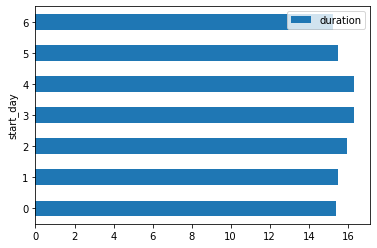

In [58]:
df[["duration", "start_day"]].groupby(by="start_day").mean().plot.barh()


<AxesSubplot:ylabel='start_hour'>

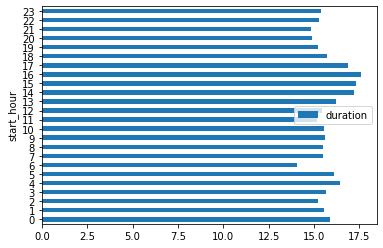

In [59]:
df[["duration", "start_hour"]].groupby(by="start_hour").mean().plot.barh()